In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb 
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
rentals = pd.read_csv('formated_OutlierFixed.csv')

In [5]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 0 to 2447
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          2267 non-null   int64  
 1   BedRooms       2267 non-null   float64
 2   SQFT           2267 non-null   float64
 3   BathRooms      2267 non-null   float64
 4   No_Smoke       2267 non-null   float64
 5   No_Park        2267 non-null   float64
 6   W_D_Lndry      2267 non-null   float64
 7   Pets           2267 non-null   float64
 8   Property_Type  2267 non-null   float64
 9   Log_Price      2267 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 194.8 KB


In [4]:
rentals.head()

,Price,BedRooms,SQFT,BathRooms,No_Smoke,No_Park,W_D_Lndry,Pets,Property_Type,Log_Price
0,1625,1.0,592.0,1.0,0.0,0.0,0.0,1.0,1.0,7.393263
1,1655,1.0,605.0,1.0,0.0,0.0,1.0,1.0,1.0,7.411556
2,1750,3.0,1850.0,2.0,1.0,0.0,1.0,1.0,2.0,7.467371
3,2225,2.0,874.0,1.0,1.0,0.0,1.0,1.0,1.0,7.707512
4,1300,1.0,575.0,1.0,1.0,0.0,0.0,0.0,1.0,7.170120


## Train / Test Split

In [20]:
X, y = rentals.drop(['Price', 'Log_Price', 'No_Park', 'No_Smoke', 'Pets'],axis=1), rentals['Price']


X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=9)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=9)

## Polynomial 2nd Degree

In [21]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
    
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)
X_poly_test = poly.transform(X_test)

## Standard Scaller

In [22]:
scaler = StandardScaler(with_mean=False)

X_scale_train = scaler.fit_transform(X_poly_train)
X_scale_val = scaler.transform(X_poly_val)
X_scale_test = scaler.transform(X_poly_test)

# Regularization

## Lasso

In [23]:
alphavec = 10**np.linspace(-2,1,10000)

lasso_model = LassoCV(alphas=alphavec, cv=3).fit(X_scale_train, y_train)

In [24]:
las_alpha = lasso_model.alpha_
las_alpha

1.3505574138463134

In [25]:
las = Lasso(alpha=las_alpha)

las.fit(X_scale_train, y_train)
print(f'Lasso Regression train R^2: {las.score(X_scale_train, y_train):.5f}')
print(f'Lasso Regression val R^2: {las.score(X_scale_val, y_val):.5f}')
print("")
print(f'Lasso Regression RMSE (train): {mean_squared_error(y_train, las.predict(X_scale_train), squared=False):.5f}')
print(f'Lasso Regression RMSE (val): {mean_squared_error(y_val, las.predict(X_scale_val), squared=False):.5f}')

Lasso Regression train R^2: 0.65768
Lasso Regression val R^2: 0.67389

Lasso Regression RMSE (train): 223.28748
Lasso Regression RMSE (val): 234.43083


## Ridge

In [26]:
alphavec = 10**np.linspace(-2,2,500)

ridge_model = RidgeCV(alphas=alphavec, cv=3)
ridge_model.fit(X_scale_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.01862899e-02, 1.03760502e-02, 1.05693455e-02,
       1.07662418e-02, 1.09668060e-02, 1.11711065e-02, 1.13792129e-02,
       1.15911962e-02, 1.18071285e-02, 1.20270833e-02, 1.22511358e-02,
       1.24793621e-02, 1.27118400e-02, 1.29486487e-02, 1.31898690e-02,
       1.34355829e-02, 1.36858742e-02, 1.39408283e-02, 1.42005318e-02,
       1.44650734e-02, 1.47345431e-0...
       6.54080591e+01, 6.66265452e+01, 6.78677305e+01, 6.91320378e+01,
       7.04198979e+01, 7.17317494e+01, 7.30680395e+01, 7.44292233e+01,
       7.58157646e+01, 7.72281357e+01, 7.86668179e+01, 8.01323013e+01,
       8.16250851e+01, 8.31456781e+01, 8.46945981e+01, 8.62723729e+01,
       8.78795401e+01, 8.95166472e+01, 9.11842520e+01, 9.28829225e+01,
       9.46132376e+01, 9.63757866e+01, 9.81711702e+01, 1.00000000e+02]),
        cv=3)

In [27]:
rid_alpha = ridge_model.alpha_
rid_alpha

3.742366290721981

In [28]:
rid = Ridge(alpha=rid_alpha)

rid.fit(X_scale_train, y_train)
print(f'Ridge Regression train R^2: {rid.score(X_scale_train, y_train):.5f}')
print(f'Ridge Regression val R^2: {rid.score(X_scale_val, y_val):.5f}')
print("")
print(f'Ridge Regression RMSE (train): {mean_squared_error(y_train, rid.predict(X_scale_train), squared=False):.5f}')
print(f'Ridge Regression RMSE (val): {mean_squared_error(y_val, rid.predict(X_scale_val), squared=False):.5f}')

Ridge Regression train R^2: 0.66335
Ridge Regression val R^2: 0.67527

Ridge Regression RMSE (train): 221.43012
Ridge Regression RMSE (val): 233.93384


###  Models Coefficients

In [30]:
rid_coefs = rid.coef_
las_coefs = las.coef_
features = rentals.columns[1:]

coef_data = {'Features': poly.get_feature_names(X.columns),
             'Ridge': rid_coefs,
             'Lasso': las_coefs}

coef_df = pd.DataFrame(coef_data)

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
coef_df.head(10)

,Features,Ridge,Lasso
0,1,0.000000,0.000000
1,BedRooms,-111.402819,-144.265680
2,SQFT,447.934450,533.458259
3,BathRooms,64.409695,0.000000
4,W_D_Lndry,43.374579,74.390274
5,Property_Type,27.810484,20.574543
6,BedRooms^2,158.454403,281.633891
7,BedRooms SQFT,209.484020,221.844006
8,BedRooms BathRooms,-202.280459,-368.031394
9,BedRooms W_D_Lndry,-41.067899,-8.118140


## Final Selected Model

In [31]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
    
X_poly_train = poly.fit_transform(X)
X_poly_test = poly.transform(X_test)

# Scaling for Ridge & Lasso 
scaler = StandardScaler(with_mean=False)

X_scale_train = scaler.fit_transform(X_poly_train)
X_scale_test = scaler.transform(X_poly_test)

In [32]:
rid = Ridge(alpha=rid_alpha)
rid.fit(X_scale_train, y)

Ridge(alpha=3.742366290721981)

## Results

In [33]:
print("Ridge - training score: ", rid.score(X_scale_train, y))
print("Rige - test score: ", rid.score(X_scale_test, y_test))
print("")
print("RMSE - training: ", mean_squared_error(y, rid.predict(X_scale_train), squared=False))
print("RMSE - test: ", mean_squared_error(y_test, rid.predict(X_scale_test), squared=False))
print("")
print("MAE - training: ", np.mean(np.abs(rid.predict(X_scale_train) - y)))
print("MAE - test: ", np.mean(np.abs(rid.predict(X_scale_test) - y_test)))

Ridge - training score:  0.6673194862559015
Rige - test score:  0.6482803117197973

RMSE - training:  223.5574301342635
RMSE - test:  214.13874494959893

MAE - training:  164.15081177121326
MAE - test:  158.3692150096682


In [38]:
### Residuals 
residual2 = (y_test - residuals)

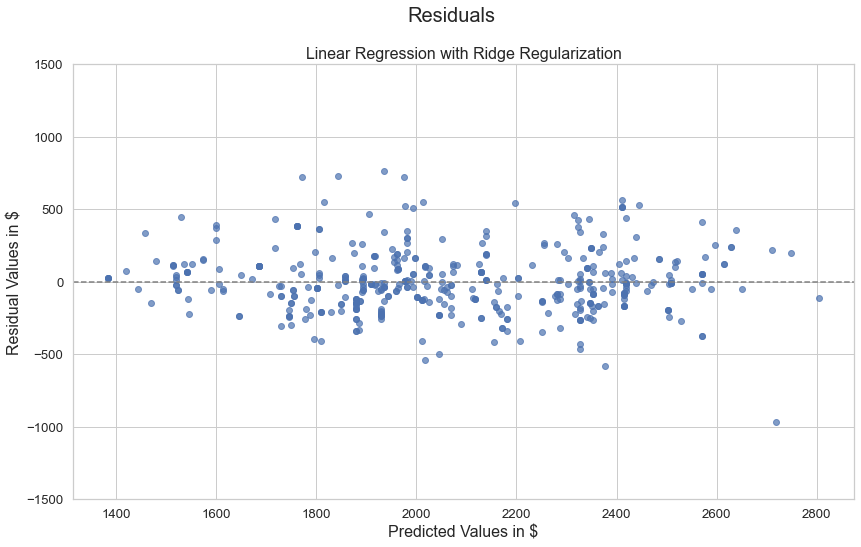

In [46]:
plt.figure(figsize=(14, 8))
plt.scatter(residuals, residual2, alpha=.7)   

plt.axhline(0, linestyle='--', color='grey')
plt.suptitle('Residuals', fontsize=20, fontname='Arial')
plt.title('Linear Regression with Ridge Regularization', fontsize=16, fontname='Arial')
plt.ylim(-1500, 1500)
plt.xlabel('Predicted Values in $', fontsize=16, fontname='Arial')
plt.ylabel('Residual Values in $', fontsize=16, fontname='Arial');

plt.savefig('Residuals_Ridge.png')

In [34]:
### Actual vs Predicted
residuals = rid.predict(X_scale_test)

/var/folders/71/xlbnyb5s341dqzxgjd0pzzqw0000gn/T/ipykernel_4316/4290510875.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plb.plot(residuals, p(residuals), 'm-', color='red')


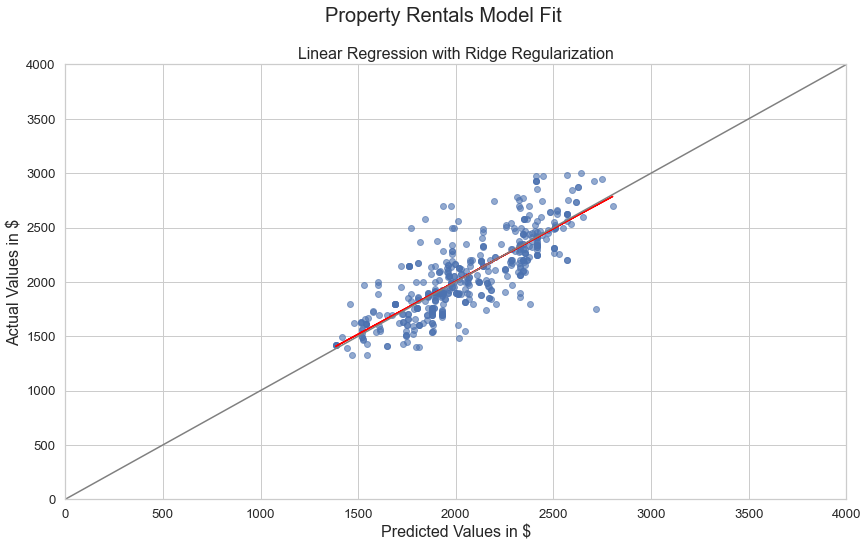

In [47]:
plt.figure(figsize=(14, 8))
plt.scatter(residuals, y_test, alpha=.6) 

z = np.polyfit(residuals, y_test, 1)
p = np.poly1d(z)
plb.plot(residuals, p(residuals), 'm-', color='red')
plt.plot(np.linspace(0,4000,1000), np.linspace(0,4000,1000), color='grey')

plt.xlim(0, 4000)
plt.ylim(0, 4000)

plt.suptitle('Property Rentals Model Fit', fontsize=20, fontname='Arial')
plt.title('Linear Regression with Ridge Regularization', fontsize=16, fontname='Arial')
plt.xlabel('Predicted Values in $', fontsize=16, fontname='Arial')
plt.ylabel('Actual Values in $', fontsize=16, fontname='Arial');

plt.savefig('Line_Fit.png')